# Playing with embeddings 

OHE and Word Embeddings are the two most common text preprocessing techniques used to convert text into numbers, 
so the text sentences can be feed to Machine Learning (ML) and Deep Learning (DL) models.

Intelligent models don't take as input raw text, they only work with numeric data. 
*Vectorizing* text is the process of transforming text into numeric tensors.

There are different ways to vectorize raw text. The top three popular vectorizing methods are:

- Segment text into words, and transform each word into a vector.
- Segment text into characters, and transform each character into a vector.
- Extract n-grams of words or characters, and transform each n-gram into a vector.

 *N-grams* are overlapping groups of multiple consecutive words or characters.

The different units which a sentence is split into, are called *tokens*. 

All *vectorizing* methods consist of first *tokenizing* the sentence (Split a sentence into different units) and then associating a vector to each *token*.

*word embeddings*,  is the most used word-level *vectorization* mehtod among the DL community.

#### Vectorization:
![Vectorization](https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_01.png)


## One-hot Encoding (OHE)

OHE is the most basic way to convert a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index *i* into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the *i* th entry, which is 1.

We can use scikit-learn(sklearn) to convert tokens into vectors using OHE. To do so, sklearn provides a `OneHotEncoder` class, which like all the other sklearn classes, has a `fit` and `transform` method. These methods do the following tasks:

- `fit`: Learns the vocabulary of our dataset, and learns how to associate a token with an integer index.
- `transform`: Accordingly with the understanding acquired in the `fit` method transforms each token to its associated vector.

In [2]:
import numpy as np
# Import ohe class
from sklearn.preprocessing import OneHotEncoder

# Declare text examples
texts = ['I study Computer Science at university',
         'My dog is called Peludet']

As we explained on the introduction, first we need to tokenize the texts. 

We will be working with a word-level tokenization, so we are going to split sentences by `' '` character.

In [3]:
# Split texts by ' '
tokenized_texts = [text.split() for text in texts]
tokenized_texts

[['I', 'study', 'Computer', 'Science', 'at', 'university'],
 ['My', 'dog', 'is', 'called', 'Peludet']]

In [4]:
# Flat the tokens lists so they are stored in a single list
tokenized_texts = [[t] for tokens in tokenized_texts for t in tokens]
tokenized_texts

[['I'],
 ['study'],
 ['Computer'],
 ['Science'],
 ['at'],
 ['university'],
 ['My'],
 ['dog'],
 ['is'],
 ['called'],
 ['Peludet']]

Now we are ready to feed the tokens to sklearn `OneHotEncoder` class `fit` method.


In [6]:
# Create OneHotEncoder instance
ohe = OneHotEncoder()

# Feed the tokens to fit method
ohe.fit(tokenized_texts)

# See what our OneHotEncoder has learned
print('Vocabulary:', ohe.get_feature_names_out())
print('Vocabulary len:', len(ohe.get_feature_names_out()))

Vocabulary: ['x0_Computer' 'x0_I' 'x0_My' 'x0_Peludet' 'x0_Science' 'x0_at'
 'x0_called' 'x0_dog' 'x0_is' 'x0_study' 'x0_university']
Vocabulary len: 11


Once we have tokenized our input sentence, it is time to transform our tokens into vectors.

When working with OHE this process is quite straightforward. Although implementing OHE by hand is trivial, sklearn facilitates, even more, the tasks.

We only need to call `transform` on our fitted `OneHotEncoder` instance.

In [7]:
# Now we can covert out tokens to vectors
## For a more clear example we will only vectorize first sentence
encoded_sentence = ohe.transform(np.array(texts[0].split()).reshape(-1, 1))
for t, v in zip(texts[0].split(), encoded_sentence):
  print('Token: {} -> Vector: {}'.format(t, v.toarray()))

Token: I -> Vector: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Token: study -> Vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Token: Computer -> Vector: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Token: Science -> Vector: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Token: at -> Vector: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Token: university -> Vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


As we can see each token is associated with an integer value *i*, which corresponds to the array *i*th position which at the time it is set to 1.

![One Hot Encoding](https://raw.githubusercontent.com/tensorflow/docs/r2.0rc/site/en/r2/tutorials/text/images/one-hot.png)

**Even though OHE is simple, it is inefficient**. A one-hot encoded vector is sparse (meaning, most indices are zero). Imagine we have 10,000 words in the vocabulary. To one-hot encode each word, we would create a vector where 99.99% of the elements are zero.

A part from the inefficiency, OHE has another big problem. Imagine that we are trying to vectorize these three words:

- great
- good
- bad

If we vectorize them using OHE we will get this result:

```python
assert good  == [1, 0, 0]
assert great == [0, 1, 0]
assert bad   == [0, 0, 1]
```

In this case, OHE vectorization result is telling us that `good` is as different as `great` and `bad` and actually this is false. So we need another vectorization method that can handle **semantic similarities**, here is where **Word Embeddings** is important.

## Word Embeddings

A more powerful way to convert tokens into vectors is the use of *dense vectors*. Those dense vectors are tokens' representations in which similar words have similar vectors. More precisely, we call those vectors *embeddings*.

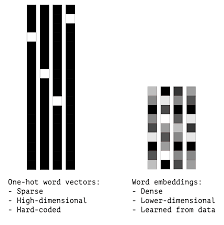

Embeddings are more useful then OHE when our problem involves a huge vocabulary. OHE needs vectors of length N to encode words belonging to a vocabulary of N tokens. On the other hand, Word Embedding uses a fixed length to encode a vocabulary of N tokens. It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. So, word embeddings pack more information into ar fewer dimensions.

Hopefully, we don't have to think a way to fill those M-dimentional dense vectors manually. Usually embeddings are obtained via two approaches:

1. Learn word embeddings joinly with the main task we care about. So in this case embeddings are an extra layer on our neural network that their weights are updated during backpropagation jointly with the task we are trying to solve, for example sentiment analysis. See [this tutorial](https://www.tensorflow.org/beta/tutorials/text/word_embeddings) to learn how to train word embeddings from scratch.

2. Load a matrix containing word embedding that were precomputed using a different machine-learning task. These are called pretrained *word embeddings*.

In this article we will focus on the second way of obtaining word embeddings. More precisely we are going to use GloVe embeddings [[4](#references)]. We are going to explore the embeddings learned from 6Billion tokens of text coming from Wikipedia.

> GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. 

### Playing with pretrained embeddings


In this section, we are going to use some vector operations and properties to see how embeddings behave and thus extract some useful takeaways. We are going to find the answer to the following sentences and more:

- What's up near a single embedding?
- What happens if we add two embeddings?

To start our journeym we first need to download the pretrained embeddings from the GloVe website. To get the `zip` file containing the embeddings we are going to use a shell *mini script*: